In [1]:
import pandas as pd
from pyvis.network import Network
import numpy as np
import re
import math

data = pd.read_excel("Matriz_para_redes.xlsx")
data = data.dropna(subset=['Actor EXT ', 'Actor COL'])
data['Actor EXT '] = data['Actor EXT '].str.split().apply(lambda x: ' '.join(word.strip() for word in x))
data['Actor COL'] = data['Actor COL'].str.split().apply(lambda x: ' '.join(word.strip() for word in x))
data['Actor EXT '] = data['Actor EXT '].str.replace(r'\n', '', regex=True)
data['Actor COL'] = data['Actor COL'].str.replace(r'\n', '', regex=True)

In [2]:
data["Actor COL"] = data["Actor COL"].replace('Dirigentes sindicales de Telecom.', 'Dirigentes sindicales de Telecom')
data["Actor COL"] = data["Actor COL"].replace('Ejercito Popular de Liberación', 'Ejército Popular de Liberación')
data["Actor COL"] = data["Actor COL"].replace('Sacedorte', 'Sacerdote')
data["Actor COL"] = data["Actor COL"].replace('ELN', 'Ejército de Liberación Nacional')
data["Actor COL"] = data["Actor COL"].replace('Aministiado', 'Amnistiado')
data["Actor COL"] = data["Actor COL"].replace('Partido Comunista Colombiano - Marxista Leninista', 'Partido Comunista Marxista-Leninista')
data["Actor COL"] = data["Actor COL"].replace('Frente Unido del Pueblo', 'Frente Unido')

data["Actor EXT "] = data["Actor EXT "].replace('Unión Sovietica', 'URSS')
data["Actor EXT "] = data["Actor EXT "].replace('"Comité" Juvenil Soviético para los países de América Latina', 'Comité Juvenil Soviético para los países de América Latina')
data["Actor EXT "] = data["Actor EXT "].replace('"Consejo de los Sindicatos Soviéticos"', 'Consejo de los Sindicatos Soviéticos')
data["Actor EXT "] = data["Actor EXT "].replace('Brigada Simón Bolívar - Nicaragua', 'Brigada Simón Bolívar')
data["Actor EXT "] = data["Actor EXT "].replace('Chequia', 'Checoslovaquia')
data["Actor EXT "] = data["Actor EXT "].replace('Ché Guevara', 'Ernesto Che Guevara')
data["Actor EXT "] = data["Actor EXT "].replace('Comité Ejecutivo de la Confederación de Trabajadores del PERU.', 'Comité Ejecutivo de la Confederación de Trabajadores del Perú')
data["Actor EXT "] = data["Actor EXT "].replace('DANIEL COHN BENDIT', 'Daniel Cohn Bendit')
data["Actor EXT "] = data["Actor EXT "].replace('Federación Internacional de Trabajadores del Transporte con sede en LONDRES', 'Federación Internacional de Trabajadores del Transporte')
data["Actor EXT "] = data["Actor EXT "].replace('JEAN PAUL SARTRE', 'Jean Paul Sarte')
data["Actor EXT "] = data["Actor EXT "].replace('MIGUEL ANGEL ASTURIAS', 'Miguel Aangel Asturias')
data["Actor EXT "] = data["Actor EXT "].replace('PABLO NERUDA', 'Pablo Neruda')
data["Actor EXT "] = data["Actor EXT "].replace('SIMONE DE BOVEAIRE', 'Simone De Boveaire')
data["Actor EXT "] = data["Actor EXT "].replace('Universidades de Brasil.', 'Universidades de Brasil')
data["Actor EXT "] = data["Actor EXT "].replace('Universidades de Méjico', 'Universidades de México')
data["Actor EXT "] = data["Actor EXT "].replace('Universidades de Peru', 'Universidades de Perú')

In [3]:
print("Número de actores colombianos:", len(set(data["Actor COL"])))
#set(sorted(map(str, data["Actor COL"]))) 

Número de actores colombianos: 72


In [4]:
print("Número de actores exteriores:", len(set(data["Actor EXT "])))
#set(sorted(map(str, data["Actor EXT "]))) 

Número de actores exteriores: 85


In [5]:
len(set(sorted(map(str, data['Tipo de relación o intercambio']))))

15

In [6]:
#set(sorted(map(str, data['Escala'])))

In [7]:
#len(set(sorted(map(str, data['Año']))))

In [8]:
#selected_column = data["Actor COL"]
#selected_column_df = pd.DataFrame({'Actor COL': selected_column})
#selected_column_df.to_excel("Matriz_para_redes_updated.xlsx", index=False)

In [9]:
def edge_exists(graph, src, dst):
    edges = graph.get_edges()
    for edge in edges:
        if set([edge['from'], edge['to']]) == set([src ,dst]):
            return True
    return False

def find_edge_index(graph, src, dst):
    edges = graph.get_edges()
    for index, edge in enumerate(edges):
        if set([edge['from'], edge['to']]) == set([src ,dst]):
            return index
    return None

def node_exists(graph, node):
    return node in graph.get_nodes()


def find_node_index(graph, src):
    nodes = graph.get_nodes()
    for index, node in enumerate(nodes):
        if node == src:
            return index
    return None

In [10]:
G = Network(select_menu=True, filter_menu=True, height="560px", width="100%", bgcolor="#FFFFFF", font_color="black", directed=False, notebook=True, cdn_resources='remote')
G.options.interaction = {'hideEdgesOnDrag': False, 'hideNodesOnDrag': False, 'dragNodes': True, 'hover': True, 'multiselect': True}

sources = data['Actor EXT ']
targets = data['Actor COL']
label = data['Tipo de relación o intercambio']
escale = data['Escala']
date = data['Año']

edge_data = zip(sources, targets, label, escale, date)

for src, dst, label, esca, dat in edge_data:
    if not node_exists(G, src):
        G.add_node(src, label=src, color='#DF0914', size=25, title=src) # Externos
        
    if not node_exists(G, dst):
        G.add_node(dst, label=dst, color='#FED801', size=25, title=dst) # Internos
    
    if edge_exists(G, src, dst):
        G.get_edges()[find_edge_index(G, src, dst)]['value'] += 0.25
        
        if label not in G.get_edges()[find_edge_index(G, src, dst)]['Tipo'].split(", "):
            G.get_edges()[find_edge_index(G, src, dst)]['Tipo'] += ", "+label
            
        if esca not in G.get_edges()[find_edge_index(G, src, dst)]['Escala'].split(", "):
            G.get_edges()[find_edge_index(G, src, dst)]['Escala'] += ", "+esca
            
        if not math.isnan(dat):
            if f"{int(dat):d}" not in G.get_edges()[find_edge_index(G, src, dst)]['Año'].split(", "):
                G.get_edges()[find_edge_index(G, src, dst)]['Año'] += ", " + f"{int(dat):d}"
        else:
            if f"{dat}" not in G.get_edges()[find_edge_index(G, src, dst)]['Año'].split(", "):
                pass
    else:
        if not math.isnan(dat):
            edge_data = {
                'source': src,
                'to': dst,
                'title': label,
                'Tipo': label,
                'color': {
                    'color': "#757574",
                    'highlight':'#000000',
                    'hover': '#000000',
                    'opacity': 0.85
                },
                'value': 1,
                'Escala': esca,
                'Año': f"{int(dat):d}",
            }
        else:
            edge_data = {
                'source': src,
                'to': dst,
                'title': label,
                'Tipo': label,
                'color': {
                    'color': "#757574",
                    'highlight':'#000000',
                    'hover': '#000000',
                    'opacity': 0.85
                },
                'value': 1,
                'Escala': esca,
                'Año': ""
            }
        G.add_edge(**edge_data)
        
pair_counts = {}
for index, row in data.iterrows():
    actor_col = row['Actor COL']
    actor_ext = row['Actor EXT ']
    # Sort the names to ensure consistency
    pair = tuple(sorted([actor_col, actor_ext]))
    if pair in pair_counts:
        pair_counts[pair] += 1
    else:
        pair_counts[pair] = 1
        
for node in G.get_nodes():
    degree = len(G.get_adj_list()[node]) - 1
    count = ((data['Actor COL'] == node) | (data['Actor EXT '] == node)).sum()
    G.nodes[find_node_index(G, node)]['size'] += 1.5*degree
    G.nodes[find_node_index(G, node)]['title'] +="\nNúmero actores conectados: "+str(degree + 1)
    G.nodes[find_node_index(G, node)]['title'] +="\nNúmero de conexiones: "+str(count)
    
for edge in G.get_edges():
    label = "Escala: "+edge['Escala']+"\n"+"Año: "+edge['Año']+"\n"+"Tipo de Conexión: "+edge['Tipo']
    G.edges[find_edge_index(G, edge['from'], edge['to'])]['title'] = label
    G.edges[find_edge_index(G, edge['from'], edge['to'])]['title'] += "\n Numero de conexiones: "+str( pair_counts.get(tuple(sorted((edge['from'], edge['to']))), 0))

#G.show_buttons(filter_=['interaction', 'nodes'])
G.barnes_hut(gravity=-3500, central_gravity=0.3, spring_strength=0.035, spring_length=190, overlap=0.65, damping=0.087)
G.save_graph("test_net.html")

In [11]:
len(G.edges)

228

In [12]:
len(G.nodes)

157

In [13]:
# Create an empty list to store (node, degree) pairs
node_degrees = []

# Calculate and store the degrees of all nodes
for node in G.get_nodes():
    count = int(G.get_node(node)['title'].split('\n')[-1].split(' ')[-1])
    node_degrees.append((node, count))

# Sort the list of (node, degree) pairs in descending order based on degree
    node_degrees.sort(key=lambda x: x[1], reverse=False)

# Get the first 10 nodes with the highest degree
top_nodes = node_degrees[:70]

# Display the top nodes and their degrees
for node, degree in top_nodes:
    print(f"{node} ({degree} conexiones),", end=' ')

Organización de Solidaridad de los Pueblos de África, Asia y América Latina (1 conexiones), Universidad Libre (1 conexiones), Organización Continental Latinoamericana y Caribeña de Estudiantes (1 conexiones), Federación Universitaria Nacional (1 conexiones), Universidad Autónoma Latinoamericana (1 conexiones), Guatemala (1 conexiones), Sindicato Colombia Pretrolium Company (1 conexiones), Juventud Liberal Nacional (1 conexiones), Juventud Anapista (1 conexiones), Juventud Nacional Conservadora (1 conexiones), Juventud Movimiento Revolucionario Liberal (1 conexiones), Juventud Demócrata Cristiana (1 conexiones), New York (1 conexiones), Federación Sindical de Trabajadores de Cundinamarca (1 conexiones), Ciudadana (1 conexiones), México (1 conexiones), Grupos armados de Venezuela (1 conexiones), Congreso Internacional Comunista (1 conexiones), Comité Ejecutivo del "Comité Coordinador de Organizaciones Juveniles de Colombia (CCOJC) (1 conexiones), Federación Nacional de Choferes (1 conexi

In [14]:
# Create an empty list to store (node, degree) pairs
node_degrees = []

# Calculate and store the degrees of all nodes
for node in G.get_nodes():
    degree = len(G.get_adj_list()[node])
    node_degrees.append((node, degree))

# Sort the list of (node, degree) pairs in descending order based on degree
node_degrees.sort(key=lambda x: x[1], reverse=True)

# Get the first 3 nodes with the highest degree
top_nodes = node_degrees[:10]

# Display the top nodes and their degrees
for node, degree in top_nodes:
    print(f"{node} ({degree} actores),", end=' ')

Cuba (24 actores), Sacerdote (19 actores), URSS (17 actores), Partido Comunista Colombiano (15 actores), Universidades de Colombia (15 actores), Intelectual (15 actores), M-19 (15 actores), Ejército de Liberación Nacional (11 actores), Frente Unido (9 actores), Chile (9 actores), 

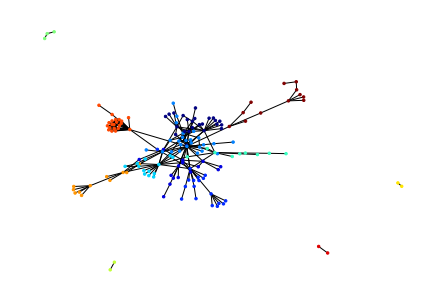

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import community

# Create an undirected graph
GG = nx.Graph()

for edge in G.get_edges():
    GG.add_edge(edge['from'], edge['to'])


part = community.best_partition(GG)
values = [part.get(node) for node in GG.nodes()]

nx.draw_spring(GG, cmap = plt.get_cmap('jet'), node_color=values, node_size=6, with_labels=False)

In [16]:
from collections import Counter

counts = Counter(part.values())
sorted_integers = sorted(counts, key=lambda k: counts[k], reverse=True)
renaming_dict = {value: index for index, value in enumerate(sorted_integers)}
part = {key: renaming_dict[value] for key, value in part.items()}

colors = {0:'#DF0914', 1:'#FED801', 2:'#9eb5ff', 3:'#b6ffbc', 4:'#b95ae6', 5:'#066701', 
          6:'#ffb000', 7:'#3bbbdb', 8:'#e07007', 9:'#021fe0', 10:'#8700ff', 11:'#ff0075', 
          12:'#54f93e', 13:'#3600a4', 14:'#ff6d79', 15:'#f8e900', 16:'#DF0914'}

for node in part:
    G.nodes[find_node_index(G, node)]['color'] = colors[part[node]]
    
G.save_graph("comunity_net.html")

In [17]:
# Calcula la centralidad de grado
degree_centrality = nx.degree_centrality(GG)

# Ordena los nodos por centralidad de grado en orden descendente y obtiene los 5 nodos más centrales
sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
top_nodes = sorted_nodes[:7]

# Muestra los 5 nodos más centrales
for node, centrality in top_nodes:
    print(f"{node},", end=' ')

Cuba, Sacerdote, URSS, Partido Comunista Colombiano, Universidades de Colombia, Intelectual, M-19, 

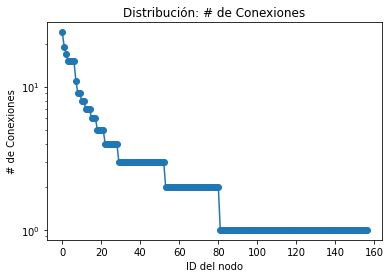

In [18]:
# Calcula la distribución de grado
degree_distribution = dict(nx.degree(GG))

# Crea un histograma de la distribución de grado
plt.plot(range(len(degree_distribution)), sorted(degree_distribution.values(), reverse=True), 'o-')
plt.ylabel("# de Conexiones")
plt.yscale('log') 
plt.xlabel("ID del nodo")
plt.title("Distribución: # de Conexiones")
plt.show()